In [1]:
# import libraries yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set matplotlib's style
plt.style.use("ggplot")

# load dataset kasus banjir
banjir_df = pd.read_csv("./data.jabarprov.go.id/bpbd-od_17600_jml_kejadian_bencana_banjir__kabupatenkota_data.csv",
                        index_col=0)

# ambil data hanya di tahun 2015 ke atas
banjir_df = banjir_df[banjir_df.tahun>=2015]

# kelompokkan berdasarkan tahun
banjir_by_tahun = banjir_df.groupby(["tahun"], as_index=False)["jumlah_banjir"].sum()
display(banjir_by_tahun.head())

,tahun,jumlah_banjir
0,2015,57
1,2016,211
2,2017,183
3,2018,136
4,2019,162


### Trend Kejadian Banjir di Provinsi Jawa Barat

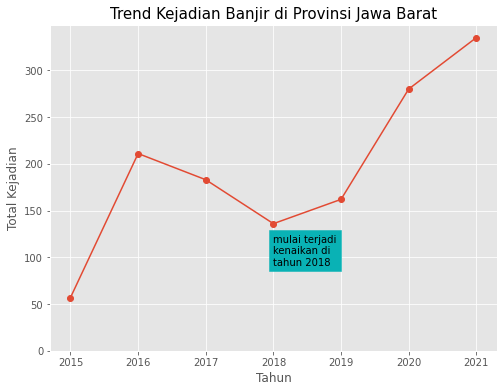

In [2]:
# plot trendnya
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(banjir_by_tahun.tahun, banjir_by_tahun.jumlah_banjir,
         marker='o', label="Kejadian\nBanjir")
plt.text(2018, 125, "mulai terjadi\nkenaikan di\ntahun 2018",
         verticalalignment="top", backgroundcolor="#09B2B5")
plt.ylim(bottom=0)
plt.title("Trend Kejadian Banjir di Provinsi Jawa Barat", fontsize=15)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Total Kejadian", fontsize=12)
plt.show()
#plt.savefig("kejadian_banjir2.png", dpi=300)

### Kota atau kabupaten yang paling sering banjir

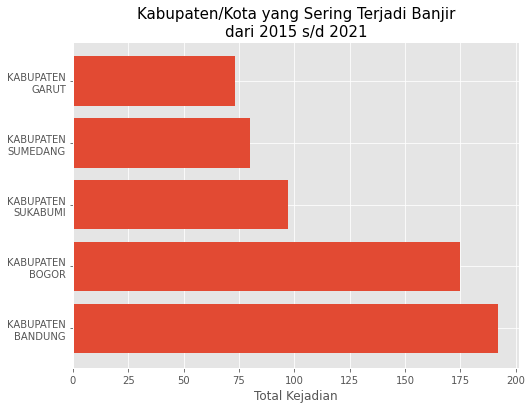

In [3]:
# mulai dari tahun 2015-2021
per_kabkot = banjir_df.groupby(["nama_kabupaten_kota"])["jumlah_banjir"].sum().sort_values(ascending=False)
kabkot_top5 = per_kabkot[:5]
label_y = []
for val in kabkot_top5.index:
    temp = val.split()
    label_y.append("{}\n{}".format(temp[0], temp[1]))

# plot hasilnya
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 6]
plt.barh(label_y, kabkot_top5.values)
plt.title("Kabupaten/Kota yang Sering Terjadi Banjir\ndari 2015 s/d 2021", fontsize=15)
plt.xlabel("Total Kejadian", fontsize=12)
plt.show()
#plt.savefig("./Images-Revisi/kabkot_sering_banjir.png", dpi=300)

### Kota atau kabupaten yang paling sering banjir per 2021

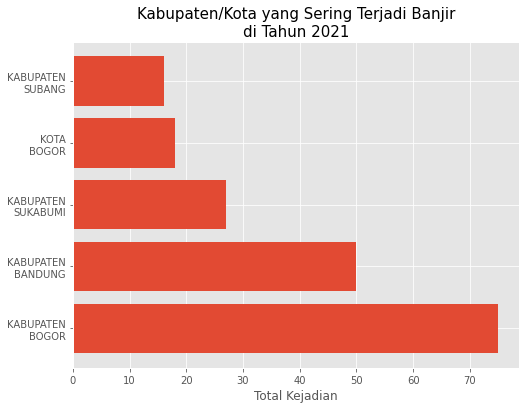

In [4]:
banjir_2021 = banjir_df[banjir_df.tahun==2021].sort_values(by=["jumlah_banjir"], ascending=False)[:5]
banjir_2021["nama"] = banjir_2021["nama_kabupaten_kota"].apply(
    lambda x: "{}\n{}".format(x.split()[0], x.split()[1]))

# plot hasilnya
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 6]
plt.barh(banjir_2021.nama, banjir_2021.jumlah_banjir)
plt.title("Kabupaten/Kota yang Sering Terjadi Banjir\ndi Tahun 2021", fontsize=15)
plt.xlabel("Total Kejadian", fontsize=12)
plt.show()
#plt.savefig("./Images-Revisi/kabkot_sering_banjir_2021.png", dpi=300)

### Bagaimana Kondisi Sampah di Jawa Barat?

In [5]:
# load dataset
prod_sampah = pd.read_csv("./data.jabarprov.go.id/disperkim-od_16985_jumlah_produksi_sampah_berdasarkan_kabupatenkota_data.csv",
                          index_col=0)
png_sampah = pd.read_csv("./data.jabarprov.go.id/disperkim-od_16984_jumlah_sampah_yang_ditangani_berdasarkan_kabupatenkota_data.csv",
                         index_col=0)

# transformasi jumlah sampah di tahun 2015-2017
cek_tahun = [2015, 2016, 2017]
temp_series = png_sampah.loc[png_sampah.tahun.isin(cek_tahun), "jumlah_sampah"]
png_sampah.loc[png_sampah.tahun.isin(cek_tahun), "jumlah_sampah"] = temp_series.apply(lambda x: x/1000)

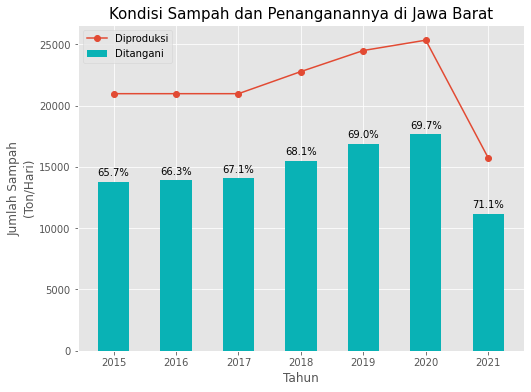

In [6]:
# kelompokkan berdasarkan tahun
prod_sampah_thn = prod_sampah.groupby(["tahun"])["jumlah_produksi_sampah"].sum()
png_sampah_thn = png_sampah.groupby(["tahun"])["jumlah_sampah"].sum()

# berhasil ditangani
pct_sampah = (prod_sampah_thn-png_sampah_thn)/prod_sampah_thn
pct_sampah = (1 - pct_sampah)*100
pct_sampah = pct_sampah.apply(lambda x: str(np.round(x, 1))+"%")

# visualisasikan
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(prod_sampah_thn.index, prod_sampah_thn, marker="o", label="Diproduksi")
plt.bar(png_sampah_thn.index, png_sampah_thn, width=0.5, color="#09B2B5", label="Ditangani")
for idx, val in zip(pct_sampah.index, pct_sampah.values):
    plt.text(idx, png_sampah_thn[idx]+500, val, horizontalalignment="center")
plt.title("Kondisi Sampah dan Penanganannya di Jawa Barat", fontsize=15)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Sampah\n(Ton/Hari)")
plt.legend()
plt.show()
#plt.savefig("sampah_dan_penanganannya.png", dpi=300)

In [7]:
# bandingkan dengan bandung dan bogor
sm_bandung = prod_sampah[prod_sampah.nama_kabupaten_kota.str.contains("BANDUNG")]
sm_bogor = prod_sampah[prod_sampah.nama_kabupaten_kota.str.contains("BOGOR")]

# kelompokkan berdasarkan tahunnya
sm_bandung = sm_bandung.groupby(["tahun"])["jumlah_produksi_sampah"].sum()
sm_bogor = sm_bogor.groupby(["tahun"])["jumlah_produksi_sampah"].sum()

### Lalu, bagaimana kondisi penanaman pohon di Jawa Barat?

In [8]:
# load dataset: penanaman pohon
pnm_pohon = pd.read_csv('./data.jabarprov.go.id/dishut-od_15083_luas_penanaman_pohon_berdasarkan_kabupatenkota_data.csv',
                        index_col=0)
pnm_pohon = pnm_pohon[pnm_pohon.tahun >= 2015]

# kelompokkan per tahun
pnm_pohon_thn = pnm_pohon.groupby(["tahun"])["luas_penanaman_pohon"].sum()

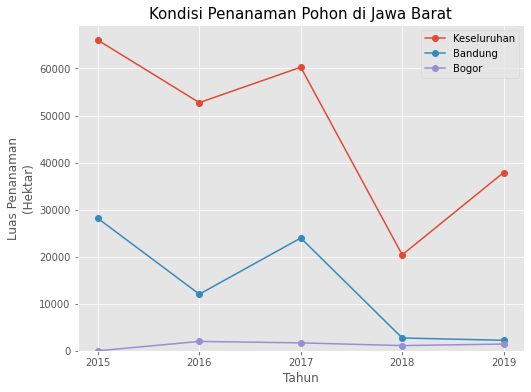

In [9]:
# ambil hanya bandung dan bogor
bandung = pnm_pohon[pnm_pohon.nama_kabupaten_kota.str.contains("BANDUNG")]
bogor = pnm_pohon[pnm_pohon.nama_kabupaten_kota.str.contains("BOGOR")]

# kelompokkan per tahunnya
bandung = bandung.groupby(["tahun"])["luas_penanaman_pohon"].sum()
bogor = bogor.groupby(["tahun"])["luas_penanaman_pohon"].sum()

# visualisasikan hasilnya
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(pnm_pohon_thn.index, pnm_pohon_thn, marker="o", label="Keseluruhan")
plt.plot(bandung.index, bandung, marker="o", label="Bandung")
plt.plot(bogor.index, bogor, marker="o", label="Bogor")
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Luas Penanaman\n(Hektar)")
plt.title("Kondisi Penanaman Pohon di Jawa Barat", fontsize=15)
plt.ylim(bottom=0)
plt.xticks([idx for idx in bandung.index],[str(idx) for idx in bandung.index])
plt.legend()
plt.show()
#plt.savefig("pnm_pohon.png", dpi=300)